In [2]:
import dynamic_low_rank as dlr
import numpy as np
import matplotlib.pyplot as plt

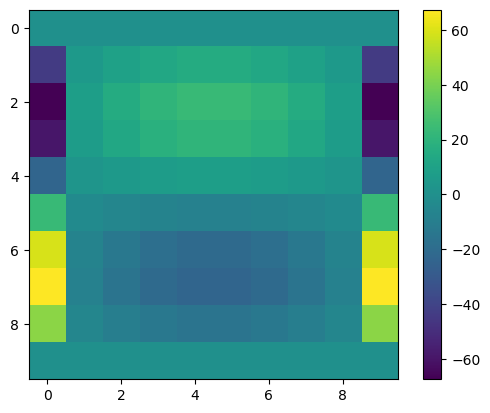

In [15]:
def laplace(m,n):
    ones = np.ones(m*n)
    k = np.min([1/n,1/m]) # dobbelsjekk
    L =  1/k**2*(2*np.diag(ones) - np.diag(ones[:-1],-1) - np.diag(ones[:-1],1)) 
    return L

def A_fun(t,n,m):
    x = np.linspace(0,1,n)
    y = np.linspace(0,1,m)
    X,Y = np.meshgrid(x,y)
    A = np.exp(-t)*np.sin(np.pi*X)*np.sin(2*np.pi*Y) #removed 5pi^2
    return A

def A_dot_fun(t,n,m):
    A = A_fun(t,n,m)
    L = laplace(n,m)
    A_dot = L@A.ravel() + A.ravel()@L
    return A_dot.reshape(n,m)


A_dot = A_dot_fun(0,10,10)
plt.imshow(A_dot)
plt.colorbar()


In [24]:
def laplace(m,n):
    ones = np.ones(m*n)
    k = np.min([1/n,1/m]) # dobbelsjekk
    L =  (2*np.diag(ones) - np.diag(ones[:-1],-1) - np.diag(ones[:-1],1)) 
    return L

A = np.array([[0,0,0],[0,0,0],[0,0,0]])
A[:,0] = 1

n,m = A.shape

L = laplace(n,m)
print(L)
print(A.ravel())

res = L@A.ravel() 

print(res.reshape(n,m))

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2.]]
[1 0 0 1 0 0 1 0 0]
[[ 2. -1. -1.]
 [ 2. -1. -1.]
 [ 2. -1.  0.]]
